In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
% cd /content/drive/MyDrive/project_data

/content/drive/MyDrive/project_data


In [ ]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Visualization of Sequence and Clade Relationship for Raw Data

In [ ]:
train = np.load("train_data_balanced.npy", allow_pickle=True)
label = np.load("train_label_balanced.npy",allow_pickle=True)
label_list = label.tolist()
train_list = train.tolist()

In [ ]:
# randomly sample a subset of sequences from each clade group
def random_sample(group, train, label):
  i = 0
  random_sampled = []
  random_sampled_labels = []
  for seq, lab in zip(train, label):
    i+= 1
    if lab == group and i%10 == 0:
      random_sampled.append(seq)
      random_sampled_labels.append(lab)
  return random_sampled, random_sampled_labels

In [ ]:
# forming the subsampled sequence and label array

g0,l0 = random_sample(0, train_list, label_list)
g1,l1 = random_sample(1, train_list, label_list)
g2,l2 = random_sample(2, train_list, label_list)
g3,l3 = random_sample(3, train_list, label_list)
g4,l4 = random_sample(4, train_list, label_list)
g5,l5 = random_sample(5, train_list, label_list)
g6,l6 = random_sample(6, train_list, label_list)
g7,l7 = random_sample(7, train_list, label_list)
g8,l8 = random_sample(8, train_list, label_list)

gall = g0+g1+g2+g3+g4+g5+g6+g7+g8
lall = l0+l1+l2+l3+l4+l5+l6+l7+l8
arr_seq = np.array(gall)
arr_lab = np.array(lall)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [ ]:
# Pad sequences that are shorter than the max length
max_len = np.max([len(a) for a in arr_seq])
new_arr_seq = np.asarray([np.pad(a, (0, max_len - len(a)), 'constant', constant_values=100) for a in arr_seq])
print('shape afted padding: ', new_arr_seq.shape)

shape afted padding:  (4343, 1276)


In [ ]:
# TSNE
tsne = TSNE(n_components=2, random_state=0, init='random', angle=0.99,  perplexity=5)
tsne_output_raw = tsne.fit_transform(new_arr_seq)

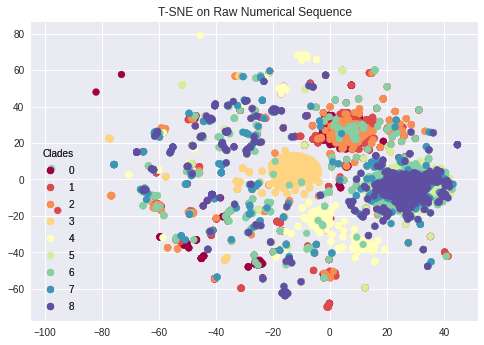

In [ ]:
# Plot T-SNE
plt.style.use('seaborn')
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_output_raw[:, 0], tsne_output_raw[:, 1],  c= arr_lab, cmap = 'Spectral')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clades")
ax.add_artist(legend1)
plt.title('T-SNE on Raw Numerical Sequence')
plt.show()

In [ ]:
# PCA
pca = PCA(n_components=2)
new_arr_2d = pca.fit_transform(new_arr_seq)
print('2d explained variance: ', pca.explained_variance_ratio_.sum())

2d explained variance:  0.6445478122557393


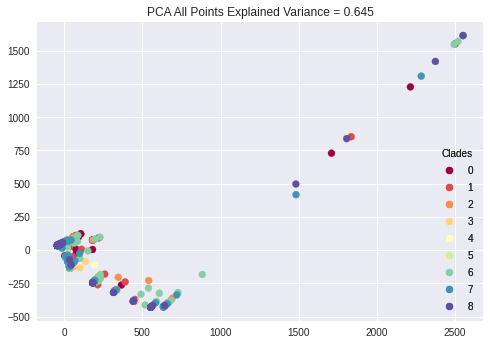

In [ ]:
# Plot PCA

fig, ax = plt.subplots()
scatter = ax.scatter(new_arr_2d [:, 0], new_arr_2d[:, 1],  c= arr_lab, cmap = 'Spectral')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Clades")
ax.add_artist(legend1)
plt.title('PCA All Points Explained Variance = 0.645')
plt.show()

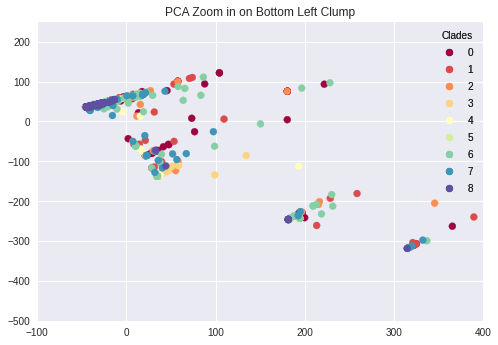

In [ ]:
# Zoom in on PCA cluster
fig, ax = plt.subplots()
scatter = ax.scatter(new_arr_2d [:, 0], new_arr_2d[:, 1],  c= arr_lab, cmap = 'Spectral')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clades")
ax.add_artist(legend1)
ax.set_xlim(-100,400)
ax.set_ylim(-500,250)
plt.title('PCA Zoom in on Bottom Left Clump')
plt.show()

## Visualization of Sequence and Clade Relationship for Embedding

In [ ]:
train_embedding = np.load('train_embeddings.npy', allow_pickle=True)
train_embed_label = np.load("train_label_balanced_new.npy", allow_pickle=True)
train_embed_list = train_embedding.tolist()
embed_label_list = train_embed_label.tolist()

In [ ]:
# forming the subsampled sequence and label array
ge0,le0 = random_sample(0, train_embed_list, embed_label_list)
ge1,le1 = random_sample(1, train_embed_list, embed_label_list)
ge2,le2 = random_sample(2, train_embed_list, embed_label_list)
ge3,le3 = random_sample(3, train_embed_list, embed_label_list)
ge4,le4 = random_sample(4, train_embed_list, embed_label_list)
ge5,le5 = random_sample(5, train_embed_list, embed_label_list)
ge6,le6 = random_sample(6, train_embed_list, embed_label_list)
ge7,le7 = random_sample(7, train_embed_list, embed_label_list)
ge8,le8 = random_sample(8, train_embed_list, embed_label_list)

ge_all = ge0+ge1+ge2+ge3+ge4+ge5+ge6+ge7+ge8
le_all = le0+le1+le2+le3+le4+le5+le6+le7+le8
arr_seq_embed = np.array(ge_all)
arr_lab_embed = np.array(le_all)

In [ ]:
print('embedding shape:', arr_seq_embed.shape)
# no need to pad because shape is consistent

embedding shape: (4343, 2048)


In [ ]:
# TSNE
tsne = TSNE(n_components=2, random_state=0, init='random', angle=0.99,  perplexity=5)
tsne_output_embed = tsne.fit_transform(arr_seq_embed)

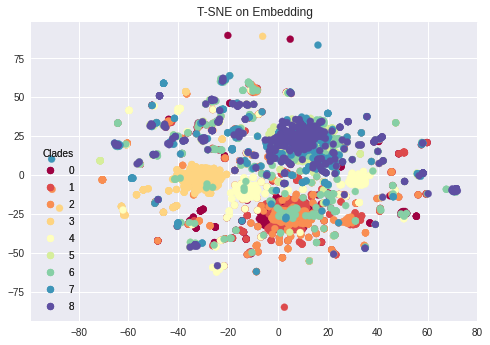

In [ ]:
# Plot T-SNE
plt.style.use('seaborn')
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_output_embed[:, 0], tsne_output_embed[:, 1],  c= arr_lab_embed, cmap = 'Spectral')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clades")
ax.add_artist(legend1)
plt.title('T-SNE on Embedding')
plt.show()

In [ ]:
# PCA
pca = PCA(n_components=2)
new_arr_2d = pca.fit_transform(arr_seq_embed)
print('2d explained variance: ', pca.explained_variance_ratio_.sum())

2d explained variance:  0.7792253638819922


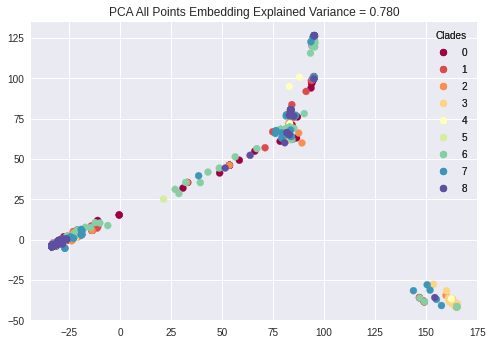

In [ ]:
# Plot PCA

fig, ax = plt.subplots()
scatter = ax.scatter(new_arr_2d [:, 0], new_arr_2d[:, 1],  c= arr_lab_embed, cmap = 'Spectral')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clades")
ax.add_artist(legend1)
plt.title('PCA All Points Embedding Explained Variance = 0.780')
plt.show()